<a href="https://colab.research.google.com/github/vinnimichelin/Regressao_Linear_Alunos_2017/blob/main/Regressao_Linear_Alunos_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from types import FunctionType

In [2]:
df = pd.read_excel('alunos.xlsx')

df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


In [4]:
df[['ano_2015', 'ano_2016']].corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


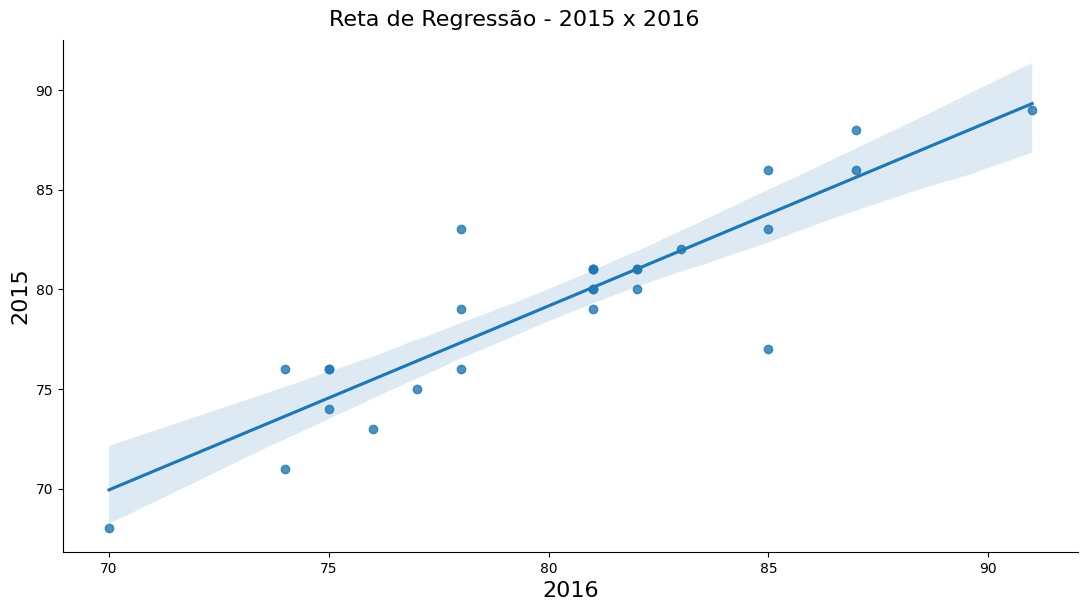

In [7]:
ax = sns.lmplot(x='ano_2016', y='ano_2015', data=df)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Reta de Regressão - 2015 x 2016', fontsize=16, y=1.02)
ax.set_xlabels('2016', fontsize=16)
ax.set_ylabels('2015', fontsize=16)

In [9]:
y = df.ano_2016
x = sm.add_constant(df.ano_2015)

resultado_regressao = sm.OLS(y,x).fit()

print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           3.02e-10
Time:                        15:24:31   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [12]:
df['ano_2017'] = resultado_regressao.predict().round()

df['residuo'] = df['ano_2017'] - df['ano_2016']

df.head()

,UF,ano_2015,ano_2016,ano_2017,residuo
0,Rondonia,77,85,78.0,-7.0
1,Acre,79,81,80.0,-1.0
2,Amazonas,83,85,83.0,-2.0
3,Roraima,81,82,82.0,0.0
4,Para,73,76,75.0,-1.0
